In [2]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\mbkhn\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [7]:
credit_card_data = pd.read_csv('creditcard.csv')

In [8]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
legit_sample = legit.sample(n=492)

In [17]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
267043,162588.0,2.076305,0.183539,-1.991667,0.451110,0.542355,-1.009372,0.319117,-0.262955,0.432012,...,-0.236113,-0.570998,0.242137,0.583720,-0.084671,0.339876,-0.075827,-0.037138,2.35,0
50697,44606.0,-0.646942,0.334413,1.501834,-1.271515,0.065255,-0.845126,0.559335,-0.013064,0.023107,...,-0.040290,-0.340621,-0.013481,-0.105770,-0.346627,0.733987,-0.010162,0.112136,38.67,0
269602,163695.0,-1.513142,0.471152,1.762687,-1.088295,0.033669,-0.586055,-0.087914,0.689651,-0.043542,...,0.017152,-0.344239,-0.258993,-0.062147,0.433706,-0.904888,-0.053161,-0.079799,1.00,0
246968,153408.0,1.944373,-0.229404,-0.666059,1.671707,-0.347378,-0.418573,-0.142945,-0.005186,1.362874,...,-0.350666,-0.680077,0.260252,-0.090145,-0.011299,-0.810771,0.031751,-0.047261,7.48,0
39947,40033.0,1.068666,-0.215634,0.801594,0.013162,-0.688575,-0.216140,-0.341395,0.092139,-0.015976,...,-0.062973,-0.268102,0.145213,0.280072,-0.111974,0.780683,-0.053391,0.013355,53.53,0


In [19]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96186.827236,0.092076,0.046601,-0.089525,0.034670,-0.001328,-0.054238,0.126569,0.018107,0.023790,...,0.029643,-0.003234,-0.037585,0.004307,0.040286,0.024395,-0.007042,0.010295,0.015000,97.454045
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [23]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [25]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
267043,162588.0,2.076305,0.183539,-1.991667,0.451110,0.542355,-1.009372,0.319117,-0.262955,0.432012,...,-0.202033,-0.236113,-0.570998,0.242137,0.583720,-0.084671,0.339876,-0.075827,-0.037138,2.35
50697,44606.0,-0.646942,0.334413,1.501834,-1.271515,0.065255,-0.845126,0.559335,-0.013064,0.023107,...,-0.021141,-0.040290,-0.340621,-0.013481,-0.105770,-0.346627,0.733987,-0.010162,0.112136,38.67
269602,163695.0,-1.513142,0.471152,1.762687,-1.088295,0.033669,-0.586055,-0.087914,0.689651,-0.043542,...,-0.191429,0.017152,-0.344239,-0.258993,-0.062147,0.433706,-0.904888,-0.053161,-0.079799,1.00
246968,153408.0,1.944373,-0.229404,-0.666059,1.671707,-0.347378,-0.418573,-0.142945,-0.005186,1.362874,...,-0.419124,-0.350666,-0.680077,0.260252,-0.090145,-0.011299,-0.810771,0.031751,-0.047261,7.48
39947,40033.0,1.068666,-0.215634,0.801594,0.013162,-0.688575,-0.216140,-0.341395,0.092139,-0.015976,...,0.060770,-0.062973,-0.268102,0.145213,0.280072,-0.111974,0.780683,-0.053391,0.013355,53.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [26]:
Y

267043    0
50697     0
269602    0
246968    0
39947     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [30]:
X.shape, X_train.shape, X_test.shape

((984, 30), (787, 30), (197, 30))

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(X_train, Y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9466327827191868


In [36]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9543147208121827


In [38]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
r_squared = r2_score(Y_test, Y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.8172541743970316


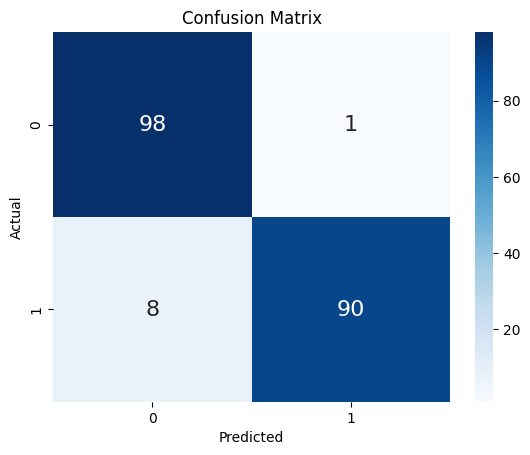

In [49]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [51]:
TP = 98
TN = 90
FP = 1
FN = 8

# Calculating metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Displaying the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Accuracy: 0.9543
Precision: 0.9899
Recall: 0.9245
F1 Score: 0.9561


These values will give you insights into the performance of your classification model. In practice, the interpretation of these metrics depends on the specific requirements and goals of your application. Higher values for accuracy, precision, recall, and F1 score are generally desirable

In [59]:
from sklearn.metrics import classification_report

# Assuming you've already trained the logistic regression model (model.fit)
Y_pred = model.predict(X_test)
Y_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        99
           1       0.99      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



In [58]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')  # You can use other scoring metrics

# Display cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.95939086 0.94416244 0.9035533  0.94416244 0.91836735]
Mean Accuracy: 0.933927276494354


The cross-validation scores for each fold are quite high, ranging from 90.36% to 95.94%.

The mean accuracy across all folds is approximately 93.39%.

This indicates that your logistic regression model is performing well on different subsets of the data. The relatively consistent high scores suggest that the model generalizes well and is not overfitting or underfitting.